import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

introduction

In [44]:
sale = pd.read_csv('C:\\Users\\LENOVO\\sales.csv')

In [45]:
sale1 = pd.read_csv('C:\\Users\\LENOVO\\sales.csv')

In [46]:
sale2 = pd.read_csv('C:\\Users\\LENOVO\\sales.csv')

In [47]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [48]:
sale.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [49]:
sale.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [50]:
sale.duplicated().sum()

0

In [51]:
sale['Date'] = pd.to_datetime(sale['instock_date'])

In [52]:
sale.head(3)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Date
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015-08-22 18:36:12
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016-03-27 21:19:13
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015-08-18 19:25:22


In [53]:
sale.sort_values(by = 'Date',inplace=True)
sale

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Date
56,SBEEH3QGU7MFYJFY,14.0,2014-02-21 06:07:06.000,1,Noah,No,Pet_care,0,41,1.0,136.0,3.0,3574.0,4756.0,641.207340,2014-02-21 06:07:06
4601,PSOEH3ZYDMSYARJ5,48.0,2014-02-22 07:07:06.000,103,Mason,Yes,Child_care,2,90,1.0,289.0,15.0,4924.0,7257.0,944.496538,2014-02-22 07:07:06
2650,SBEEH3QGYGHFUEXN,3.0,2014-02-24 10:30:21.000,301,William,No,Pet_care,0,31,0.0,139.0,9.0,2274.0,3802.0,3171.780675,2014-02-24 10:30:21
3939,SHOEH3DZBFR88SCK,49.0,2014-02-25 07:07:06.000,367,Isabella,Yes,Cosmetics,0,10,0.0,208.0,13.0,2363.0,5265.0,4026.557304,2014-02-25 07:07:06
3812,SHOEH4KM2W3Z6EH5,7.0,2014-02-25 10:30:21.000,450,Mia,Yes,Pet_care,0,89,1.0,167.0,10.0,2991.0,4981.0,614.569402,2014-02-25 10:30:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,TSHEBSF8CMAF9GMW,12.0,2016-03-30 21:01:39.000,458,Dimas,No,Organic,0,19,0.0,114.0,5.0,7086.0,10088.0,8704.419471,2016-03-30 21:01:39
1011,TSHEBSF9Q5AUSNGS,47.0,2016-03-30 21:01:46.000,358,Dmarion,No,Home_decor,3,81,0.0,268.0,17.0,2135.0,16144.0,9287.348224,2016-03-30 21:01:46
117,TSHEBSFAYNFJY6ZY,2.0,2016-03-30 21:02:09.000,255,Edwardo,No,Home_decor,2,32,0.0,280.0,10.0,124.0,604.0,642.749100,2016-03-30 21:02:09
4714,RNGE8Z3MGUD542BT,41.0,2016-03-30 21:02:52.000,37,Exodus,No,Cosmetics,2,45,0.0,206.0,15.0,4721.0,6637.0,5855.801472,2016-03-30 21:02:52


In [54]:
sale.dropna(subset=['Selling_Price','Product_Category'],inplace=True)


In [55]:
sale

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Date
56,SBEEH3QGU7MFYJFY,14.0,2014-02-21 06:07:06.000,1,Noah,No,Pet_care,0,41,1.0,136.0,3.0,3574.0,4756.0,641.207340,2014-02-21 06:07:06
4601,PSOEH3ZYDMSYARJ5,48.0,2014-02-22 07:07:06.000,103,Mason,Yes,Child_care,2,90,1.0,289.0,15.0,4924.0,7257.0,944.496538,2014-02-22 07:07:06
2650,SBEEH3QGYGHFUEXN,3.0,2014-02-24 10:30:21.000,301,William,No,Pet_care,0,31,0.0,139.0,9.0,2274.0,3802.0,3171.780675,2014-02-24 10:30:21
3939,SHOEH3DZBFR88SCK,49.0,2014-02-25 07:07:06.000,367,Isabella,Yes,Cosmetics,0,10,0.0,208.0,13.0,2363.0,5265.0,4026.557304,2014-02-25 07:07:06
3812,SHOEH4KM2W3Z6EH5,7.0,2014-02-25 10:30:21.000,450,Mia,Yes,Pet_care,0,89,1.0,167.0,10.0,2991.0,4981.0,614.569402,2014-02-25 10:30:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,TSHEBSF8CMAF9GMW,12.0,2016-03-30 21:01:39.000,458,Dimas,No,Organic,0,19,0.0,114.0,5.0,7086.0,10088.0,8704.419471,2016-03-30 21:01:39
1011,TSHEBSF9Q5AUSNGS,47.0,2016-03-30 21:01:46.000,358,Dmarion,No,Home_decor,3,81,0.0,268.0,17.0,2135.0,16144.0,9287.348224,2016-03-30 21:01:46
117,TSHEBSFAYNFJY6ZY,2.0,2016-03-30 21:02:09.000,255,Edwardo,No,Home_decor,2,32,0.0,280.0,10.0,124.0,604.0,642.749100,2016-03-30 21:02:09
4714,RNGE8Z3MGUD542BT,41.0,2016-03-30 21:02:52.000,37,Exodus,No,Cosmetics,2,45,0.0,206.0,15.0,4721.0,6637.0,5855.801472,2016-03-30 21:02:52


In [56]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 56 to 3741
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6327 non-null   object        
 1   Stall_no          6322 non-null   float64       
 2   instock_date      6327 non-null   object        
 3   Market_Category   6327 non-null   int64         
 4   Customer_name     6120 non-null   object        
 5   Loyalty_customer  6327 non-null   object        
 6   Product_Category  6327 non-null   object        
 7   Grade             6327 non-null   int64         
 8   Demand            6327 non-null   int64         
 9   Discount_avail    6290 non-null   float64       
 10  charges_1         6129 non-null   float64       
 11  charges_2 (%)     6123 non-null   float64       
 12  Minimum_price     6289 non-null   float64       
 13  Maximum_price     5986 non-null   float64       
 14  Selling_Price     6327 

In [57]:
sale.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
Date                  0
dtype: int64

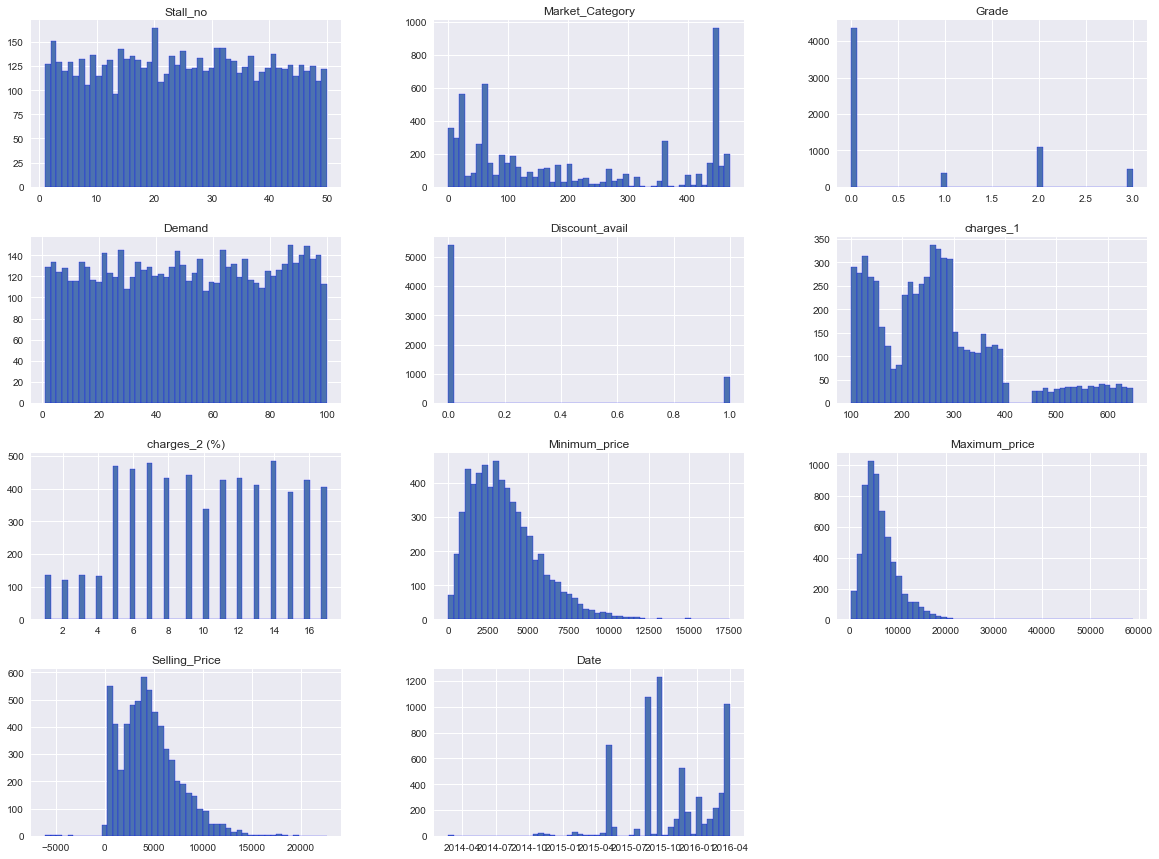

In [58]:
plt.style.use('seaborn')
sale.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [59]:
sale['month/Year'] = sale['Date'].apply(lambda x:"%d/%d" % (x.month, x.year)) 

In [60]:
p=sale.groupby(['month/Year', 'Product_Category','Discount_avail']).size()

In [61]:
p.head(20)

month/Year  Product_Category  Discount_avail
1/2015      Child_care        0.0                2
            Educational       0.0                2
            Fashion           0.0                2
            Home_decor        0.0                1
            Hospitality       0.0                1
            Organic           0.0                1
            Pet_care          0.0                2
            Repair            0.0                1
            Technology        0.0                2
1/2016      Child_care        0.0               33
                              1.0               15
            Cosmetics         0.0               18
                              1.0               13
            Educational       0.0               24
                              1.0               10
            Fashion           0.0               24
                              1.0               11
            Home_decor        0.0               33
                              1.0    

In [62]:
sale['week/month/Year'] = sale['Date'].apply(lambda x:"%d/%d/%d" % (x.week,x.month, x.year)) 

In [63]:
s=sale.groupby(['week/month/Year', 'Product_Category','Discount_avail']).size()

In [64]:
s.head(30)

week/month/Year  Product_Category  Discount_avail
1/1/2016         Child_care        0.0               17
                                   1.0               12
                 Cosmetics         0.0               10
                                   1.0               10
                 Educational       0.0               13
                                   1.0                5
                 Fashion           0.0               15
                                   1.0                7
                 Home_decor        0.0               14
                                   1.0               12
                 Hospitality       0.0               12
                                   1.0               11
                 Organic           0.0               14
                                   1.0                9
                 Pet_care          0.0               14
                                   1.0               13
                 Repair            0.0               1

In [65]:
q=sale.groupby(['month/Year','Discount_avail']).size()
q.head

<bound method NDFrame.head of month/Year  Discount_avail
1/2015      0.0                 14
1/2016      0.0                267
            1.0                130
10/2014     0.0                 17
10/2015     0.0                 69
            1.0                 14
11/2014     0.0                 33
11/2015     0.0                557
            1.0                 96
12/2014     0.0                  2
12/2015     0.0                118
            1.0                 76
2/2014      0.0                  2
            1.0                  3
2/2015      0.0                 31
2/2016      0.0                235
            1.0                109
3/2015      0.0                  9
3/2016      0.0               1158
            1.0                194
4/2015      0.0                 30
            1.0                  3
5/2015      0.0                703
            1.0                 55
7/2015      0.0                 49
            1.0                 12
8/2015      0.0                95

In [66]:
sale

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Date,month/Year,week/month/Year
56,SBEEH3QGU7MFYJFY,14.0,2014-02-21 06:07:06.000,1,Noah,No,Pet_care,0,41,1.0,136.0,3.0,3574.0,4756.0,641.207340,2014-02-21 06:07:06,2/2014,8/2/2014
4601,PSOEH3ZYDMSYARJ5,48.0,2014-02-22 07:07:06.000,103,Mason,Yes,Child_care,2,90,1.0,289.0,15.0,4924.0,7257.0,944.496538,2014-02-22 07:07:06,2/2014,8/2/2014
2650,SBEEH3QGYGHFUEXN,3.0,2014-02-24 10:30:21.000,301,William,No,Pet_care,0,31,0.0,139.0,9.0,2274.0,3802.0,3171.780675,2014-02-24 10:30:21,2/2014,9/2/2014
3939,SHOEH3DZBFR88SCK,49.0,2014-02-25 07:07:06.000,367,Isabella,Yes,Cosmetics,0,10,0.0,208.0,13.0,2363.0,5265.0,4026.557304,2014-02-25 07:07:06,2/2014,9/2/2014
3812,SHOEH4KM2W3Z6EH5,7.0,2014-02-25 10:30:21.000,450,Mia,Yes,Pet_care,0,89,1.0,167.0,10.0,2991.0,4981.0,614.569402,2014-02-25 10:30:21,2/2014,9/2/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,TSHEBSF8CMAF9GMW,12.0,2016-03-30 21:01:39.000,458,Dimas,No,Organic,0,19,0.0,114.0,5.0,7086.0,10088.0,8704.419471,2016-03-30 21:01:39,3/2016,13/3/2016
1011,TSHEBSF9Q5AUSNGS,47.0,2016-03-30 21:01:46.000,358,Dmarion,No,Home_decor,3,81,0.0,268.0,17.0,2135.0,16144.0,9287.348224,2016-03-30 21:01:46,3/2016,13/3/2016
117,TSHEBSFAYNFJY6ZY,2.0,2016-03-30 21:02:09.000,255,Edwardo,No,Home_decor,2,32,0.0,280.0,10.0,124.0,604.0,642.749100,2016-03-30 21:02:09,3/2016,13/3/2016
4714,RNGE8Z3MGUD542BT,41.0,2016-03-30 21:02:52.000,37,Exodus,No,Cosmetics,2,45,0.0,206.0,15.0,4721.0,6637.0,5855.801472,2016-03-30 21:02:52,3/2016,13/3/2016


In [67]:
lower_bound = '2014-09-30 00:00:00'
upper_bound ='2015-04-01 00:00:00'
sale['Discount_avail']=np.where((lower_bound<sale['Date'])&(sale['Date']<upper_bound) ,sale['Discount_avail'].fillna(0.0),sale['Discount_avail'])
sale['Discount_avail'].head(60)

56      1.0
4601    1.0
2650    0.0
3939    0.0
3812    1.0
772     0.0
952     0.0
4392    0.0
4367    0.0
5461    0.0
5015    0.0
2233    0.0
3150    0.0
4143    0.0
885     0.0
2073    0.0
4446    0.0
1916    0.0
4779    0.0
2803    0.0
2035    0.0
1311    0.0
50      0.0
104     0.0
1081    0.0
3836    0.0
821     0.0
564     0.0
5449    0.0
2221    0.0
3765    0.0
1218    0.0
5853    0.0
5601    0.0
6212    0.0
4260    0.0
3021    0.0
860     0.0
3452    0.0
2894    0.0
2486    0.0
6291    0.0
4924    0.0
3198    0.0
1230    0.0
3057    0.0
2402    0.0
2722    0.0
2576    0.0
3324    0.0
5877    0.0
4920    0.0
5313    0.0
6317    0.0
637     0.0
188     0.0
888     0.0
6       0.0
4199    0.0
286     0.0
Name: Discount_avail, dtype: float64

In [68]:
sale.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       34
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
Date                  0
month/Year            0
week/month/Year       0
dtype: int64

In [69]:
r=sale.groupby(['month/Year','Grade','Discount_avail']).size()
r.head(60)

month/Year  Grade  Discount_avail
1/2015      0      0.0                10
            1      0.0                 2
            2      0.0                 2
1/2016      0      0.0               198
                   1.0                97
            1      0.0                 1
                   1.0                 2
            2      0.0                61
                   1.0                26
            3      0.0                 7
                   1.0                 5
10/2014     0      0.0                11
            1      0.0                 2
            2      0.0                 4
10/2015     0      0.0                48
                   1.0                11
            1      0.0                 5
            2      0.0                10
                   1.0                 2
            3      0.0                 6
                   1.0                 1
11/2014     0      0.0                20
            1      0.0                 3
            2      0.0 

In [70]:
sale.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.005254,-0.005062,0.003070,-0.020343,-0.010733,-0.004029,-0.000394,0.007399,0.011733
Market_Category,-0.005254,1.000000,-0.035902,-0.018040,-0.003008,0.019139,0.024895,0.195888,0.134984,0.138711
Grade,-0.005062,-0.035902,1.000000,0.010543,-0.026647,-0.024713,-0.016009,-0.077312,0.166191,0.086450
Demand,0.003070,-0.018040,0.010543,1.000000,0.008192,-0.008551,0.017853,0.009699,0.003915,-0.000601
Discount_avail,-0.020343,-0.003008,-0.026647,0.008192,1.000000,-0.004465,0.018841,0.011156,-0.003240,-0.512276
charges_1,-0.010733,0.019139,-0.024713,-0.008551,-0.004465,1.000000,0.270698,0.018247,0.011605,0.053045
charges_2 (%),-0.004029,0.024895,-0.016009,0.017853,0.018841,0.270698,1.000000,0.006103,0.010472,0.009031
Minimum_price,-0.000394,0.195888,-0.077312,0.009699,0.011156,0.018247,0.006103,1.000000,0.707679,0.700444
Maximum_price,0.007399,0.134984,0.166191,0.003915,-0.003240,0.011605,0.010472,0.707679,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512276,0.053045,0.009031,0.700444,0.766928,1.000000


In [71]:
u=sale['charges_1'].mean()
v=sale['charges_2 (%)'].mean()
w=sale['Minimum_price'].median()
z=sale['Maximum_price'].median()
sale['charges_1'].fillna(u,inplace=True)
sale['charges_2 (%)'].fillna(v,inplace=True)
sale['Minimum_price'].fillna(w,inplace=True)
sale['Maximum_price'].fillna(z,inplace=True)


In [72]:
sale.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       34
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
Date                  0
month/Year            0
week/month/Year       0
dtype: int64

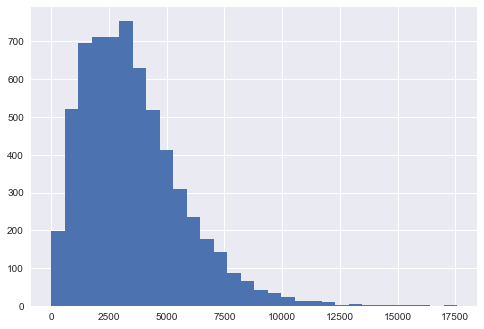

In [73]:
x=sale['Minimum_price']
y=x.to_numpy()
z=np.sort(y)
Q1=np.percentile(z,25)
Q3=np.percentile(z,75)
IQR =Q3-Q1
lower_fence =Q1-(1.5*IQR)
higher_fence =Q3+(1.5*IQR)
sale=sale[sale['Minimum_price']< higher_fence]
plt.hist(z,bins=30)
plt.show()

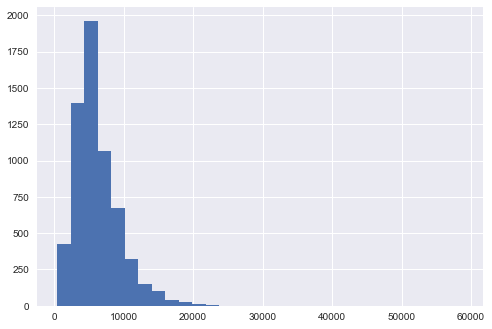

In [74]:
x=sale['Maximum_price']
y=x.to_numpy()
z=np.sort(y)
Q1=np.percentile(z,25)
Q3=np.percentile(z,75)
IQR =Q3-Q1
lower_fence =Q1-(1.5*IQR)
higher_fence =Q3+(1.5*IQR)
sale=sale[sale['Maximum_price']< higher_fence]
plt.hist(z,bins=30)
plt.show()

In [75]:
sale.drop(['Product_id','Stall_no','instock_date','Market_Category','Customer_name','Date','month/Year','week/month/Year'],axis=1,inplace=True)

In [76]:
sale=pd.get_dummies(data = sale ,columns=['Loyalty_customer','Product_Category','Grade','Discount_avail'],drop_first= True)

In [77]:
sale

,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_1,Grade_2,Grade_3,Discount_avail_1.0
56,41,136.0,3.0,3574.0,4756.0,641.207340,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4601,90,289.0,15.0,4924.0,7257.0,944.496538,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2650,31,139.0,9.0,2274.0,3802.0,3171.780675,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3939,10,208.0,13.0,2363.0,5265.0,4026.557304,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3812,89,167.0,10.0,2991.0,4981.0,614.569402,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,27,482.0,5.0,4212.0,8594.0,6870.979500,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4511,19,114.0,5.0,7086.0,10088.0,8704.419471,0,0,0,0,0,0,1,0,0,0,0,0,0,0
117,32,280.0,10.0,124.0,604.0,642.749100,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4714,45,206.0,15.0,4721.0,6637.0,5855.801472,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
X= sale.drop(['Selling_Price'],axis=1)
y= sale['Selling_Price']

In [79]:
from sklearn.preprocessing import MinMaxScaler
min_scaler=MinMaxScaler()
scaled_data = min_scaler.fit_transform(X)
scaled_data 

array([[0.4040404 , 0.06557377, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.8989899 , 0.3442623 , 0.875     , ..., 1.        , 0.        ,
        1.        ],
       [0.3030303 , 0.07103825, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31313131, 0.32786885, 0.5625    , ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.19307832, 0.875     , ..., 1.        , 0.        ,
        0.        ],
       [0.25252525, 0.18579235, 0.4375    , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [81]:
model.score(X_test,y_test)

0.9001985784669956

In [82]:
y_pred = model.predict(X_test)

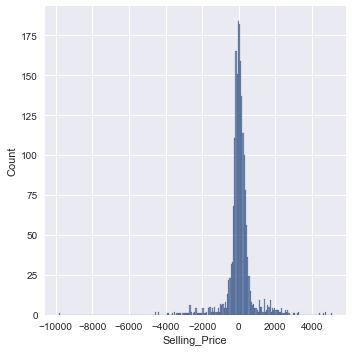

In [83]:
sns.displot(y_test-y_pred)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)
from sklearn.neighbors import KNeighborsRegressor

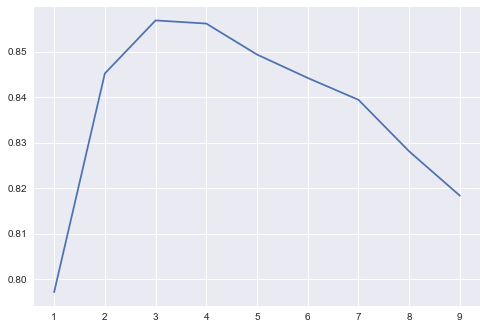

In [85]:
score_list =[]
for i in range(1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
plt.plot(range(1,10),score_list)
plt.show()

In [87]:
score_list1 =[]
score_list2 =[]
def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.1,1.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('Product_Category'):
            m= np.mean(subdf.Minimum_price)
            s=np.std(subdf.Minimum_price)
            reduced_df =subdf[(subdf.Minimum_price>(m-i*s))&(Minimum_price<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(sale)
    
    X=df4(['Selling_Price'],axis=1)
    y=df4.Selling_Price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


SyntaxError: invalid syntax (304715623.py, line 11)